<a href="https://colab.research.google.com/github/nischitpatel/GRIP-The-Sparks-Foundation-Tasks/blob/main/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRIP: The Sparks Foundation**
**Data Science and Business Analytics Intern** 

**Author: Nischit Patel** 

**Task 2: Prediction using Unsupervised ML** 

In this task it is required to predict the optimum number of cluster for the iris dataset. iris dataset consists of 3 types of flowers namely iris-setosa, iris-versicolour and iris-verginica 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('iris_csv.csv')
print(data.shape)
data.head()

(150, 5)


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [ ]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data.duplicated().sum()

3

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(147, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


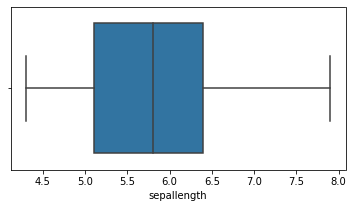

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


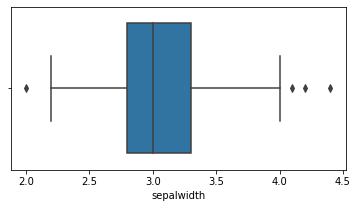

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


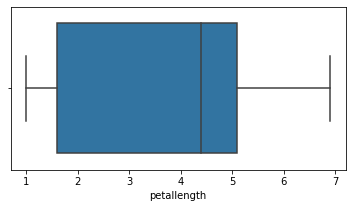

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


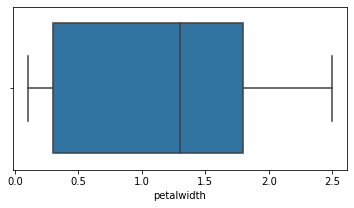

In [ ]:
#check if any outliers present
for i in data.columns:
  if data[i].dtype == 'float64':
    plt.figure(figsize=(6, 3))
    sns.boxplot(data[i])
    plt.show()

In [ ]:
#treating outliers
q1,q3 = np.percentile(data['sepalwidth'],[25,75])
iqr = q3-q1
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
data['sepalwidth'] = data['sepalwidth'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


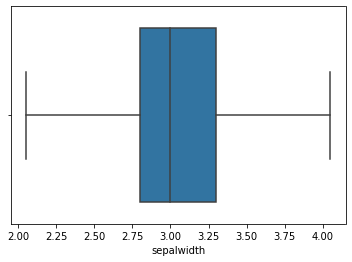

In [ ]:
sns.boxplot(data['sepalwidth'])

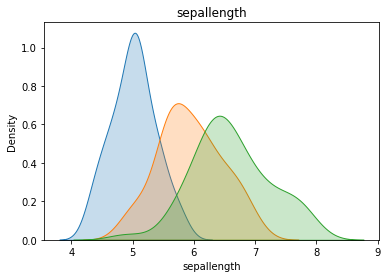

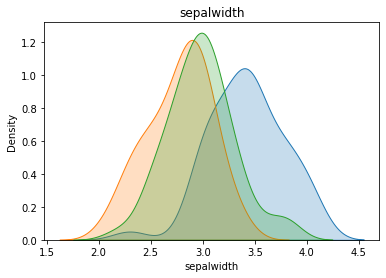

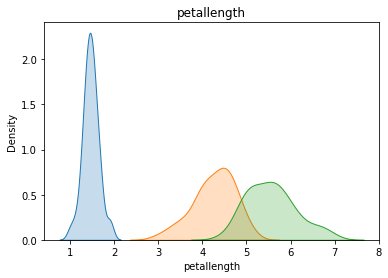

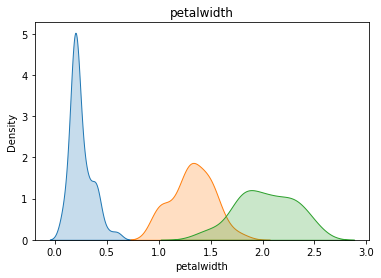

In [ ]:
#feature distribution by species(class)
for i in data.columns[:-1]:
  sns.kdeplot(data = data.loc[data['class']=='Iris-setosa'][i], label='Iris-setosa', shade=True)
  sns.kdeplot(data = data.loc[data['class']=='Iris-versicolor'][i], label='Iris-versicolor', shade=True)
  sns.kdeplot(data = data.loc[data['class']=='Iris-virginica'][i], label='Iris-virginica', shade=True)
  plt.title(i)
  plt.show()

In [ ]:
#Correlation matrix
data.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.110155,0.871305,0.817058
sepalwidth,-0.110155,1.000000,-0.420140,-0.355139
petallength,0.871305,-0.420140,1.000000,0.961883
petalwidth,0.817058,-0.355139,0.961883,1.000000


##**KMeans Clustreing**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sumOfSquaredError = []
for i in range (1,11):
  kmeans = KMeans(n_jobs=-1, n_clusters=i)
  kmeans.fit(data.iloc[:,[0,1,2,3]])
  sumOfSquaredError.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow method to find optimal value of K')

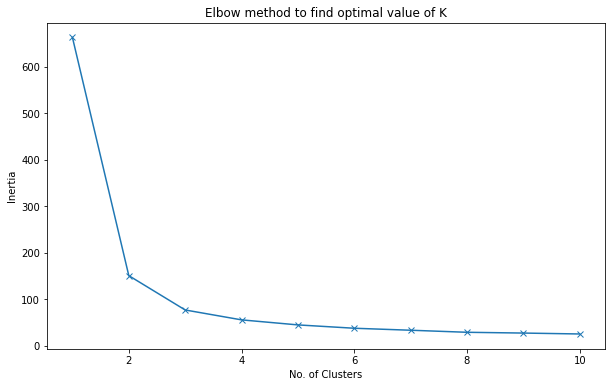

In [ ]:
df = pd.DataFrame({'Cluster':range(1,11), 'SSE':sumOfSquaredError})
plt.figure(figsize=(10,6))
plt.plot(df['Cluster'], df['SSE'], marker='x')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method to find optimal value of K')

In [ ]:
kmeans = KMeans(n_jobs=-1, n_clusters=3)
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
data['clusters'] = kmeans.labels_
data

,sepallength,sepalwidth,petallength,petalwidth,class,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [ ]:
#let see how many 0,1,2 are there
display(data['clusters'].value_counts(),data['class'].value_counts())

2    61
1    48
0    38
Name: clusters, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64

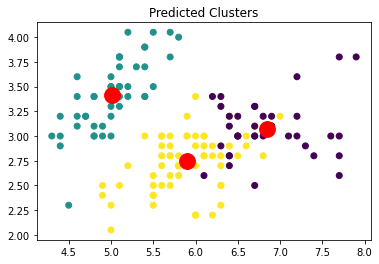

In [ ]:
plt.scatter(data['sepallength'], data['sepalwidth'], c=data.clusters)
plt.title('Predicted Clusters')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250, c='red', label='Centroids')
plt.show()

In [ ]:
data.loc[data['class']=='Iris-setosa']['clusters'].value_counts()

1    48
Name: clusters, dtype: int64

In [ ]:
data.loc[data['class']=='Iris-versicolor']['clusters'].value_counts()

2    48
0     2
Name: clusters, dtype: int64

In [ ]:
data.loc[data['class']=='Iris-virginica']['clusters'].value_counts()

0    36
2    13
Name: clusters, dtype: int64

In [ ]:
data['species'] = data['class'].apply(lambda x: 0 if x=='Iris-setosa' else 1 if x=='Iris-versicolor' else 2)
data

,sepallength,sepalwidth,petallength,petalwidth,class,clusters,species
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,2


In [ ]:
#let see the classification report
from sklearn.metrics import classification_report
print(classification_report(data['species'], data['clusters']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00        50
           2       0.21      0.27      0.24        49

    accuracy                           0.09       147
   macro avg       0.07      0.09      0.08       147
weighted avg       0.07      0.09      0.08       147

